# INF552 HW-5  Zhifeng Liu 2912549136

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
from math import log10
warnings.filterwarnings('ignore')

(a) Download the Anuran Calls (MFCCs) Data Set. Choose 70% of the data randomly as the training set.

In [26]:
data = pd.read_csv("./Anuran Calls (MFCCs)/Frogs_MFCCs.csv", sep=",",header=0)
train_data, test_data = train_test_split(data, train_size= 0.7)

(b)ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.

In [3]:
def GaussianSVM(train_x, train_y):
    C = np.logspace(-5, 8, 10)
    scores=[]
    for c in C:
        svc = SVC(kernel='rbf', C=c)
        svc.fit(train_x, train_y)
        scores.append(svc.score(train_x, train_y))
    scores=np.array(scores)
    score_ind = np.argwhere(scores>0.9).flatten()
    c_low = C[score_ind[0]]
    c_high = C[score_ind[-1]]
    
    gamma = np.append(np.logspace(-4, -1, 10), np.logspace(0, 2, 10))
    scores2 = []
    for g in gamma:
        svc = SVC(kernel='rbf', gamma=g)
        svc.fit(train_x, train_y)
        scores2.append(svc.score(train_x, train_y))
    scores2 = np.array(scores2)
    index = np.argwhere(scores2 > 0.9).flatten()
    gamma_low = gamma[index[0]]
    gamma_high = gamma[index[-1]]

    param_grid = {'C': np.logspace(log10(c_low), log10(c_high), 10),
                  'gamma': np.logspace(log10(gamma_low), log10(gamma_high), 10)}
    
    kf = StratifiedKFold(n_splits=10, shuffle=True)
    model_select = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')
    model_select.fit(train_x, train_y)
    
    return model_select

In [5]:
labels = ['Family', 'Genus', 'Species']
pred = pd.DataFrame()
for l in labels:
    train_x = train_data.iloc[:, :-4]
    train_y = train_data[l]
    test_x = test_data.iloc[:, :-4]
    test_y = test_data[l]
    model = GaussianSVM(train_x, train_y)
    print(str(l) + 'label SVM classifer model''s best parameters are', model.best_params_)
    pred[l] = model.predict(test_x)

Familylabel SVM classifer models best parameters are {'C': 38.04056104782507, 'gamma': 2.3462288481422626}
Genuslabel SVM classifer models best parameters are {'C': 5.994842503189409, 'gamma': 1.406527242105237}
Specieslabel SVM classifer models best parameters are {'C': 5.994842503189409, 'gamma': 1.406527242105237}


In [33]:
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC

In [35]:

loss= []
score= []
for l in labels:
    print(str(l),'label SVM clssifer Hamming loss:', hamming_loss(test_data[l], pred[l]))
    print(str(l),'label SVM clssifer Accuracy score:', accuracy_score(test_data[l], pred[l]))
    loss.append(hamming_loss(test_data[l], pred[l]))
    score.append(accuracy_score(test_data[l], pred[l]))



Family label SVM clssifer Hamming loss: 0.006021306160259379
Family label SVM clssifer Accuracy score: 0.9939786938397406
Genus label SVM clssifer Hamming loss: 0.009263547938860583
Genus label SVM clssifer Accuracy score: 0.9907364520611394
Species label SVM clssifer Hamming loss: 0.009726725335803613
Species label SVM clssifer Accuracy score: 0.9902732746641963


In [36]:
print('The whole dataset Hamming loss is', np.mean(loss))
print('The whole dataset Exact match score is', np.mean(score))

The whole dataset Hamming loss is 0.008337193144974525
The whole dataset Exact match score is 0.9916628068550254


(b)iii. Repeat 1(b)ii with L1-penalized SVMs.Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [37]:
def linearSVC(train_x, train_y):
    C2 = np.logspace(-5, 5, 10)
    scores = []
    for c in C2:
        svc = LinearSVC(penalty='l1', C=c, dual=False)
        svc.fit(train_x, train_y)
        scores.append(svc.score(train_x, train_y))
    scores = np.array(scores)
    index = np.argwhere(scores > 0.9).flatten()
    c2_low = C2[index[0]]
    c2_high = C2[index[-1]]
    
    #do fine grid cross validation
    param_grid = {'C': np.logspace(log10(c2_low), log10(c2_high), 10)}
    
    svc = LinearSVC(penalty='l1', dual=False)
    kf = StratifiedKFold(n_splits=10, shuffle=True)
    clf = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')
    clf.fit(train_x, train_y)   
    return clf

In [38]:
labels = ['Family', 'Genus', 'Species']
pred = pd.DataFrame()
for l in labels:
    train_x = train_data.iloc[:, :-4]
    train_y = train_data[l]
    test_x = test_data.iloc[:, :-4]
    test_y = test_data[l]
    model = linearSVC(train_x, train_y)
    print(str(l), 'label SVM classifer model''s best parameters are', model.best_params_)
    pred[l] = model.predict(test_x)

Family label SVM classifer models best parameters are {'C': 108.90229622637294}
Genus label SVM classifer models best parameters are {'C': 100000.0}
Species label SVM classifer models best parameters are {'C': 100000.0}


In [39]:

loss= []
score= []
for l in labels:
    print(str(l),'label SVM clssifer Hamming loss:', hamming_loss(test_data[l], pred[l]))
    print(str(l),'label SVM clssifer Accuracy score:', accuracy_score(test_data[l], pred[l]))
    loss.append(hamming_loss(test_data[l], pred[l]))
    score.append(accuracy_score(test_data[l], pred[l]))
print('The whole dataset Hamming loss is', np.mean(loss))
print('The whole dataset Exact match score is', np.mean(score))

Family label SVM clssifer Hamming loss: 0.07271885132005558
Family label SVM clssifer Accuracy score: 0.9272811486799444
Genus label SVM clssifer Hamming loss: 0.0523390458545623
Genus label SVM clssifer Accuracy score: 0.9476609541454377
Species label SVM clssifer Hamming loss: 0.04075961093098657
Species label SVM clssifer Accuracy score: 0.9592403890690134
The whole dataset Hamming loss is 0.05527250270186815
The whole dataset Exact match score is 0.9447274972981319


(b)iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [29]:
from imblearn.over_sampling import SMOTE 
def sm_linearSVC(train_x, train_y):
    sm = SMOTE()
    train_x_sm, train_y_sm = sm.fit_sample(train_x, train_y)

    C2 = np.logspace(-3, 3, 10)
    scores = []
    for c in C2:
        svc = LinearSVC(penalty='l1', C=c, dual=False)
        svc.fit(train_x, train_y)
        scores.append(svc.score(train_x_sm, train_y_sm))
    scores = np.array(scores)
    index = np.argwhere(scores > 0.7).flatten()
    c2_low = C2[index[0]]
    c2_high = C2[index[-1]]

    param_grid = {'C': np.logspace(log10(c2_low), log10(c2_high), 10)}
    
    svc = LinearSVC(penalty='l1', dual=False)
    kf = StratifiedKFold(n_splits=10, shuffle=True)
    clf = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')
    clf.fit(train_x_sm, train_y_sm)   
    return clf

In [30]:
labels = ['Family', 'Genus', 'Species']
pred = pd.DataFrame()
for l in labels:
    train_x = train_data.iloc[:, :-4]
    train_y = train_data[l]
    test_x = test_data.iloc[:, :-4]
    test_y = test_data[l]
    model = sm_linearSVC(train_x, train_y)
    print(str(l), 'label SVM classifer model''s best parameters are', model.best_params_)
    pred[l] = model.predict(test_x)

Family label SVM classifer models best parameters are {'C': 16.681005372000584}
Genus label SVM classifer models best parameters are {'C': 426.2158829015325}
Species label SVM classifer models best parameters are {'C': 1000.0}


In [34]:
loss= []
score= []
for l in labels:
    print(str(l),'label SVM clssifer Hamming loss:', hamming_loss(test_data[l], pred[l]))
    print(str(l),'label SVM clssifer Accuracy score:', accuracy_score(test_data[l], pred[l]))
    loss.append(hamming_loss(test_data[l], pred[l]))
    score.append(accuracy_score(test_data[l], pred[l]))
print('The whole dataset Hamming loss is', np.mean(loss))
print('The whole dataset Exact match score is', np.mean(score))

Family label SVM clssifer Hamming loss: 0.07966651227420102
Family label SVM clssifer Accuracy score: 0.9203334877257989
Genus label SVM clssifer Hamming loss: 0.08707735062528948
Genus label SVM clssifer Accuracy score: 0.9129226493747105
Species label SVM clssifer Hamming loss: 0.04492820750347383
Species label SVM clssifer Accuracy score: 0.9550717924965262
The whole dataset Hamming loss is 0.07055735680098811
The whole dataset Exact match score is 0.9294426431990118


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score
from tqdm import tqdm

In [6]:
data = pd.read_csv("./Anuran Calls (MFCCs)/Frogs_MFCCs.csv", sep=",",header=0)
train_x = data.iloc[:, :-4]

In [17]:
def clustering():
    best_k = 0
    best_score = 0
    best_labels = []
    for k in range(2, 50):
        kmeans = KMeans(n_clusters=k).fit(train_x)
        labels = kmeans.labels_
        score = calinski_harabaz_score(train_x,labels)
        if score > best_score:
            best_score = score
            best_labels = labels
            best_k = k

    print("The best k is", best_k)
    best_label = best_labels
    
    data_label = data[['Family', 'Genus', 'Species']].copy()
    data_label['kmeans_label'] = best_label
    
    majority_label = {}
    for l in range(best_k):
        cluster = data_label[data_label['kmeans_label'] == l]
        majority_triplet = {}
        for t in ['Family', 'Genus', 'Species']:
            majority_triplet[t] = cluster[t].value_counts().idxmax()
        majority_label[l] = majority_triplet
    print("Majority labels:\n", majority_label)
    
    misclassifed = 0
    for l in range(best_k):
        cluster = data_label[data_label['kmeans_label'] == l]
        for t in ['Family', 'Genus', 'Species']:
            misclassifed += sum(cluster[t] != majority_label[l][t])
    hamming_loss = misclassifed / (len(data) * 3)
    return hamming_loss

Monte-Carlo Simulation:

In [18]:
hamming_loss = []
for i in tqdm(range(50)):
    hamming_loss.append(clustering())

  2%|▏         | 1/50 [00:36<29:50, 36.54s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


  4%|▍         | 2/50 [01:08<28:03, 35.07s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


  6%|▌         | 3/50 [01:40<26:52, 34.30s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


  8%|▊         | 4/50 [02:14<26:04, 34.01s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 10%|█         | 5/50 [02:47<25:18, 33.76s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 12%|█▏        | 6/50 [03:20<24:38, 33.59s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 14%|█▍        | 7/50 [03:52<23:44, 33.13s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 16%|█▌        | 8/50 [04:24<23:03, 32.94s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 18%|█▊        | 9/50 [04:56<22:19, 32.68s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 20%|██        | 10/50 [05:29<21:42, 32.55s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 22%|██▏       | 11/50 [06:01<21:09, 32.56s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 24%|██▍       | 12/50 [06:34<20:36, 32.55s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 26%|██▌       | 13/50 [07:06<19:58, 32.40s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 28%|██▊       | 14/50 [07:38<19:26, 32.40s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 30%|███       | 15/50 [08:11<18:52, 32.36s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 32%|███▏      | 16/50 [08:43<18:22, 32.43s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 34%|███▍      | 17/50 [09:15<17:48, 32.38s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 36%|███▌      | 18/50 [09:47<17:12, 32.26s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 38%|███▊      | 19/50 [10:20<16:46, 32.46s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 40%|████      | 20/50 [10:53<16:16, 32.56s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 42%|████▏     | 21/50 [11:24<15:33, 32.20s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 44%|████▍     | 22/50 [11:57<15:07, 32.43s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 46%|████▌     | 23/50 [12:31<14:45, 32.81s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 48%|████▊     | 24/50 [13:10<14:57, 34.51s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 50%|█████     | 25/50 [13:50<15:08, 36.35s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 52%|█████▏    | 26/50 [14:28<14:45, 36.91s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 54%|█████▍    | 27/50 [15:02<13:42, 35.77s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 56%|█████▌    | 28/50 [15:06<09:37, 26.24s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 58%|█████▊    | 29/50 [15:39<09:54, 28.33s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 60%|██████    | 30/50 [16:12<09:54, 29.73s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 62%|██████▏   | 31/50 [16:46<09:49, 31.02s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 64%|██████▍   | 32/50 [17:20<09:35, 31.95s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 66%|██████▌   | 33/50 [17:54<09:13, 32.58s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 68%|██████▊   | 34/50 [18:28<08:46, 32.93s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 70%|███████   | 35/50 [19:02<08:19, 33.28s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 72%|███████▏  | 36/50 [19:38<07:56, 34.02s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 74%|███████▍  | 37/50 [20:13<07:28, 34.47s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 76%|███████▌  | 38/50 [20:48<06:56, 34.71s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 78%|███████▊  | 39/50 [21:24<06:23, 34.87s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 80%|████████  | 40/50 [21:58<05:47, 34.72s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 82%|████████▏ | 41/50 [22:32<05:11, 34.63s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 84%|████████▍ | 42/50 [23:08<04:39, 34.91s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 86%|████████▌ | 43/50 [23:44<04:06, 35.20s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 88%|████████▊ | 44/50 [24:18<03:29, 34.90s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 90%|█████████ | 45/50 [24:50<02:50, 34.01s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 92%|█████████▏| 46/50 [25:23<02:14, 33.69s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


 94%|█████████▍| 47/50 [25:55<01:39, 33.13s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 96%|█████████▌| 48/50 [26:27<01:05, 32.95s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}


 98%|█████████▊| 49/50 [27:00<00:32, 32.87s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


100%|██████████| 50/50 [27:33<00:00, 32.96s/it]

The best k is 2
Majority labels:
 {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}


In [19]:
mean = np.mean(hamming_loss)
std = np.std(hamming_loss)
print("The average of hamming loss is", mean)
print("The standard deviation of hamming loss is", std)

The average of hamming loss is 0.29854065323141077
The standard deviation of hamming loss is 5.551115123125783e-17


## 3. ISLR 10.7.2

(a)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.4472135954999579, 0.4472135954999579, 0.0],
  [0.0, 0.7648529270389177, 0.7648529270389177, 0.0],
  [0.4472135954999579,
   1.2010412149464313,
   1.2010412149464313,
   0.7648529270389177]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['g', 'r', 'b']}

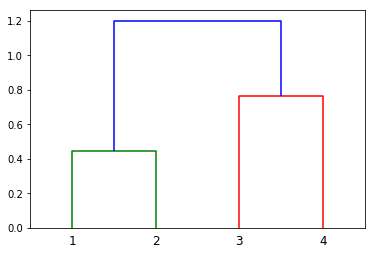

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
d = np.matrix([[0, 0.3, 0.4, 0.7], [0.3, 0, 0.5, 0.8], [0.4, 0.5, 0, 0.45], [0.7, 0.8, 0.45, 0]])
z = linkage(d, method='complete')
dendrogram(z, labels=[1,2,3,4])

(b)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.4472135954999579, 0.4472135954999579, 0.0],
  [0.0, 0.65, 0.65, 0.4472135954999579],
  [0.0, 0.7648529270389177, 0.7648529270389177, 0.65]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['g', 'b', 'b']}

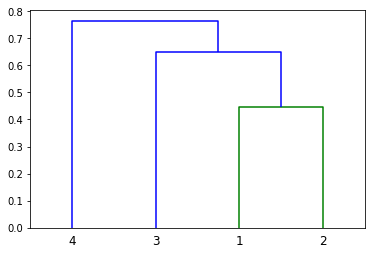

In [22]:
z2 = linkage(d, method='single')
dendrogram(z2, labels=[1,2,3,4])

(c) In (a) result, One cluster contains 1st, 2nd observaton, the other cluster contains 3rd, 4th observation

(d) in (b) result, one cluster contains 4th observation, the other cluster contains 3rd, 1st, 2rd obervation

(e)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.4472135954999579, 0.4472135954999579, 0.0],
  [0.0, 0.7648529270389177, 0.7648529270389177, 0.0],
  [0.4472135954999579,
   1.2010412149464313,
   1.2010412149464313,
   0.7648529270389177]],
 'ivl': [2, 1, 4, 3],
 'leaves': [0, 1, 2, 3],
 'color_list': ['g', 'r', 'b']}

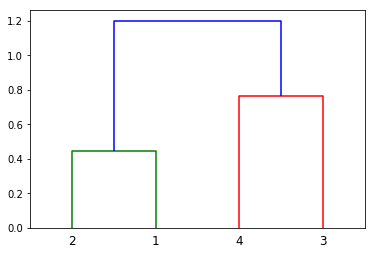

In [23]:
dendrogram(z, labels=[2,1,4,3])